In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage import measure
import mahotas as mh
import imutils


In [66]:
def showImg(img, colored=False):
  plt.figure(figsize=(10,10))
  plt.axis("off")
  if (len(img.shape) == 3):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  elif(colored):
    plt.imshow(img)
  else:
    plt.imshow(img, 'gray')

  plt.show()

def showLabels(labels):
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.imshow(labels, cmap="tab20")

images = [cv2.imread(f"./images/count/count{i}.jpg") for i in range(1,13)]

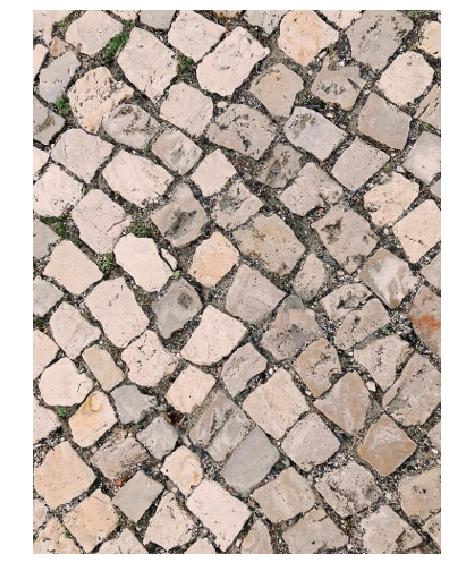

In [58]:
for img in images[6]
showImg(img)

[INFO] 636 unique contours found


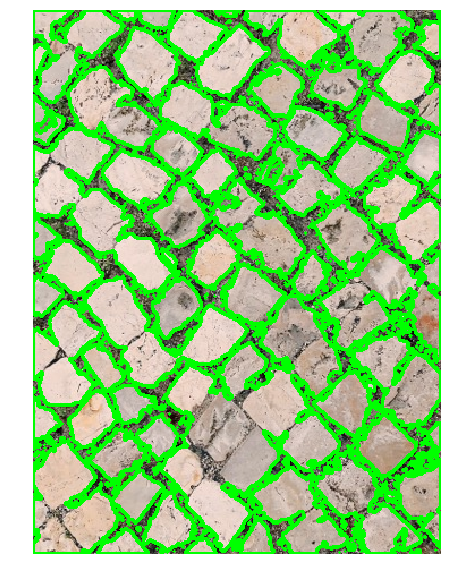

In [61]:
def hw2(img):
    shifted = cv2.pyrMeanShiftFiltering(img, 21,51)
    showImg(shifted)

    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    showImg(thresh)
    # find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print("[INFO] {} unique contours found".format(len(cnts)))

    # loop over the contours
    for (i, c) in enumerate(cnts):
        # draw the contour
        ((x, y), _) = cv2.minEnclosingCircle(c)
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)

    # show the output image
    showImg(img)

    D = ndimage.distance_transform_edt(thresh)
    localMax = peak_local_max(D, indices=False, min_distance=15, labels=thresh)

    # perform a connected component analysis on the local peaks,
    # using 8-connectivity, then appy the Watershed algorithm
    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-D, markers, mask=thresh)

    showLabels(labels)
    print(f"Count elements = {len(np.unique(labels[labels != 0]))}")

Count elements = 83


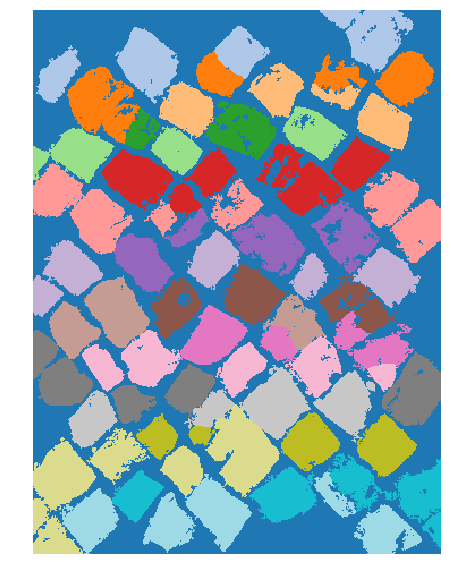

In [68]:
len(np.unique(labels[labels != 0]))

83

In [64]:
len(np.unique(labels[labels != 0]))

83